# Algoritmo de Simon

## Problema de Simon

O algoritmo de Simon (AS) foi muito importante na história da computação quântica. Este algoritmo foi o primeiro exemplo de separação exponencial entre as complexidades quântica e clássica (clássica com aleatoriedade). Além disso, o algoritmo de Simon, por envolver periodicidade de funções, motivou Peter Shor a propor seu algoritmo de fatoração de inteiros em primos.

Vamos começar com algumas definições. Vamos considerar agora uma função de $n$ bits em $n$ bits:
$$f:\{0,1\}^{n}\rightarrow \{0,1\}^{n}.$$
Dizemos que essa função é
$$2\text{-pra-}1$$
se, para cada valor de $f$, existem somente 2 elementos $a$ e $b$ do domínio tais que
$$f(a)=f(b).$$
Esses elementos formam um par
$$(a,b)$$
que é chamado de _par colisor_.


Definição (__propriedade de Simon__): Uma função $f:\{0,1\}^n\rightarrow \{0,1\}^n$ que é $2$-pra-$1$ tem a propriedade de Simon se exist uma única sequência de $n$ bits $r\in\{0,1\}^n$ tal que
$$a\oplus b=r$$
para todo par colisor $(a,b).$ $\square$

Nesta definição, $a\oplus b$ denota a soma módulo $2$ (XOR) bit a bit das sequências de $n$ bits $a$ e $b$. Note que $a\oplus b$ é uma sequência de $n$ bits.

Notemos que para qualquer par colisor $(a,b)$, teremos que
$$a\oplus b = r\ \therefore\ a\oplus a\oplus b = 0\oplus b = b = a\oplus r.$$
Ou seja, $r$ marca uma espécie de periodicidade para os pares colisores.

_Exemplo:_ Consideremos $f:\{0,1\}^3\rightarrow \{0,1\}^3$ com
\begin{align}
x=\ & \ 000,\ 001,\ 010,\ 011,\ 100,\ 101,\ 110,\ 111, \\
f(x)= & \ 011,\ 101,\ 000,\ 010,\ 101,\ 011,\ 010,\ 000.
\end{align}
Identificamos assim os pares colisores $(000,101)$, $(001,100)$, $(010,111)$ e $(011,110).$ Para tomos esses pares colisores, teremos que
\begin{align}
& 000\oplus 101 = 101 = r,\\
& 001\oplus 100 = 101 = r, \\
& 010\oplus 111 = 101 = r, \\
& 011\oplus 110 = 101 = r.
\end{align}
Vemos assim que essa função possui a propriedade de Simon.
$\square$

Definição (__problema de Simon__): Dada uma caixa preta que calcula uma função $f:\{0,1\}^n\rightarrow \{0,1\}^n$ que é $2$-pra-$1$ e que tem a propriedade de Simon, obtenha a sequência de $n$ bits $r$ usando o número mínimo possível de chamadas da caixa preta. $\square$

Vale observar que dentre as $2^n$ amostras, e não sabemos quais formam pares colisores.

## Algoritmo quântico de Simon

Para resolver o problema de Simon usando computadores quânticos, usamos o algoritmo de Simon, que está ilustrado na figura abaixo.

![](https://drive.google.com/uc?export=view&id=1vmDEdEyxMa7xzF47Us-PZuC9ouQ5z_VU)

Note que a estrutura geral do algoritmo de Simon é similar àquela do algoritmo de Bernstein-Vazirani, com a grande diferença que o 1º usa $n$ qubits auxiliares enquanto que o 2º usa somente um.




Nesse algoritmo, começamos inicializando 2 grupos de $n$ qubits no estado
$$|\Psi_{0}\rangle = |0\rangle^{\otimes n}\otimes|0\rangle^{\otimes n}.$$

Seguindo, como fizemos no algoritmo de Deutsch-Jozsa (ADJ) e no algoritmo de Bernstein-Vazirani (ABV), aplicamos transformada de Hadamard no primeiro grupo de $n$ qubits. Obtemos assim o estado
\begin{align}
& |\Psi_{1}\rangle = \big(H^{\otimes n}\otimes I^{\otimes n}\big)|\Psi_{0}\rangle \\
& = H^{\otimes n}|0\rangle^{\otimes n}\otimes|0\rangle^{\otimes n} \\
& = |+\rangle^{\otimes n}\otimes|0\rangle^{\otimes n} \\
& = \frac{1}{2^{n/2}}\sum_{x=0}^{2^{n}-1}|x\rangle\otimes|0\rangle^{\otimes n}.
\end{align}

Também como nos ADJ e ABV, aqui a ação da caixa preta quântica é a seguinte
$$U_{f}|x\rangle\otimes|y\rangle=|x\rangle\otimes|y\oplus f(x)\rangle.$$
Podemos também escrever o operador unitário para o oráculo como segue
$$U_{f} = \sum_{x,y=0}^{2^{n}-1}|x\rangle\langle x|\otimes|y\oplus f(x)\rangle\langle y|.$$

Com isso, aplicando o oráculo no estado acima,  teremos que
\begin{align}
& |\Psi_{2}\rangle = U_{f}|\Psi_{1}\rangle \\
& = \frac{1}{2^{n/2}}\sum_{x=0}^{2^{n}-1}U_{f}|x\rangle\otimes|0\rangle^{\otimes n} \\
& = \frac{1}{2^{n/2}}\sum_{x=0}^{2^{n}-1}U_{f}|x\rangle\otimes|0\rangle \\
& = \frac{1}{2^{n/2}}\sum_{x=0}^{2^{n}-1}|x\rangle\otimes|0\oplus f(x)\rangle \\
& = \frac{1}{2^{n/2}}\sum_{x=0}^{2^{n}-1}|x\rangle\otimes|f(x)\rangle.
\end{align}

Vale observar que, diferentemente dos ADJ e ABV, neste ponto do algoritmo de Simon (AS) parece que temos _emaranhamento_ criado. Isso é interessante, uma vez que o AS é o 1º desta classe a prover uma separação exponencial clássico-quântico em complexidade computacional.

Tendo isso em mente, vamos separar, mentalmente, o domínio $D=\{0,1,\cdots,2^n -1\}$ em 2 subconjuntos $D_a$ e $D_b$ de mesmo tamanho, em que cada subconjunto contém somente um elemento de cada par colisor. Assim, podemos escrever
\begin{align}
& |\Psi_{2}\rangle = \frac{1}{2^{n/2}}\Big(\sum_{x\in D_a}|x\rangle\otimes|f(x)\rangle + \sum_{x\in D_b}|x\rangle\otimes|f(x)\rangle\Big) \\
& = \frac{1}{2^{n/2}}\Big(\sum_{x\in D_a}|x\rangle\otimes|f(x)\rangle + \sum_{x\in D_a}|x\oplus r\rangle\otimes|f(x\oplus r)\rangle\Big) \\
& = \frac{1}{2^{n/2}}\sum_{x\in D_a}\big(|x\rangle\otimes|f(x)\rangle + |x\oplus r\rangle\otimes|f(x)\rangle\Big) \\
& = \frac{1}{2^{n/2}}\sum_{x\in D_a}\big(|x\rangle + |x\oplus r\rangle\big)\otimes|f(x)\rangle,
\end{align}
em que usamos que $b=a\oplus r$ para $(a,b)$ sendo um par colisor.

Seguindo, aplicaremos portas de Hadamard em cada um dos $n$ qubits do 1º registro. Similarmente ao que fizemos no algoritmo de Bernstein-Vazirani, vamos escrever a porta de Hadamard como
$$H = \frac{1}{2^{1/2}}\sum_{x_j,y_j=0}^1 (-1)^{x_j y_j}|x_j\rangle\langle y_j|$$
para reescrever a transformação de Hadamard como segue
\begin{align}
H^{\otimes n} & = \frac{1}{2^{1/2}}\sum_{x_1,y_1=0}^1 (-1)^{x_1 y_1}|x_1\rangle\langle y_1|\otimes \frac{1}{2^{1/2}}\sum_{x_2,y_2=0}^1 (-1)^{x_2 y_2}|x_2\rangle\langle y_2|\otimes\cdots\otimes \frac{1}{2^{1/2}}\sum_{x_n,y_n=0}^1 (-1)^{x_n y_n}|x_n\rangle\langle y_n| \\
& = \frac{1}{2^{n/2}}\sum_{x_1,\cdots,x_n,y_1,\cdots,y_n=0}^1 (-1)^{x_1 y_1+x_2 y_2+\cdots+x_n y_n}|x_1\cdots x_n\rangle\langle y_1\cdots y_n|  \\
& = \frac{1}{2^{n/2}}\sum_{x,y=0}^{2^{n}-1}(-1)^{x\cdot y}|x\rangle\langle y| \\
& = \sum_{y=0}^{2^{n}-1}\Big(\frac{1}{2^{n/2}}\sum_{x=0}^{2^{n}-1}(-1)^{x\cdot y}|x\rangle\Big)\langle y| \\
& = \sum_{y=0}^{2^{n}-1}|\psi_{y}\rangle\langle y|,
\end{align}
em que definimos
$$|\psi_{y}\rangle = \frac{1}{2^{n/2}}\sum_{x=0}^{2^{n}-1}(-1)^{x\cdot y}|x\rangle.$$
Note que já mostramos que os estados $\{|\psi_{y}\rangle\}_{y=0}^{2^n -1}$ formam uma base ortonormal completa.

Aplicando a transformada de Hadamard nos qubits do 1º registro, os $n$ primeiros qubits, obteremos o seguinte estado
\begin{align}
& |\Psi_3\rangle = \big(H^{\otimes n}\otimes I^{\otimes n}\big)|\Psi_3\rangle \\
& = \frac{1}{2^{n/2}}\sum_{x\in D_a}\big(H^{\otimes n}|x\rangle + H^{\otimes n}|x\oplus r\rangle\big)\otimes|f(x)\rangle \\
& = \frac{1}{2^{n/2}}\sum_{x\in D_a}\Big(\sum_{y=0}^{2^{n}-1}|\psi_{y}\rangle\langle y|x\rangle + \sum_{y=0}^{2^{n}-1}|\psi_{y}\rangle\langle y|x\oplus r\rangle\Big)\otimes|f(x)\rangle \\
& = \frac{1}{2^{n/2}}\sum_{x\in D_a}\Big(\sum_{y=0}^{2^{n}-1}|\psi_{y}\rangle\delta_{y,x} + \sum_{y=0}^{2^{n}-1}|\psi_{y}\rangle\delta_{y,x\oplus r}\Big)\otimes|f(x)\rangle \\
& = \frac{1}{2^{n/2}}\sum_{x\in D_a}\big(|\psi_{x}\rangle + |\psi_{x\oplus r}\rangle\big)\otimes|f(x)\rangle \\
& = \frac{1}{2^{n/2}}\sum_{x\in D_a}\Big(\frac{1}{2^{n/2}}\sum_{y=0}^{2^{n}-1}(-1)^{y\cdot x}|y\rangle + \frac{1}{2^{n/2}}\sum_{y=0}^{2^{n}-1}(-1)^{y\cdot x\oplus r}|y\rangle\Big)\otimes|f(x)\rangle \\
& = \frac{1}{2^{n}}\sum_{x\in D_a}\sum_{y=0}^{2^{n}-1}\Big((-1)^{y\cdot x} + (-1)^{y\cdot x\oplus y\cdot r}\Big)|y\rangle\otimes|f(x)\rangle \\
& = \frac{1}{2^{n}}\sum_{x\in D_a}\sum_{y=0}^{2^{n}-1}\Big((-1)^{y\cdot x} + (-1)^{y\cdot x}(-1)^{y\cdot r}\Big)|y\rangle\otimes|f(x)\rangle \\
& = \frac{1}{2^{n}}\sum_{x\in D_a}\sum_{y=0}^{2^{n}-1}(-1)^{y\cdot x}\big(1 + (-1)^{y\cdot r}\big)|y\rangle\otimes|f(x)\rangle.
\end{align}




Para este estado preparado, medimos todos os qubits na base computacional. Para um dado valor obtido para a medida nos $n$ qubits do 2º registro, ou seja, para um certo valor de $f(x)$, a amplitude de probabilidade do estado $|y\rangle$ é não nula somente se
$$y\cdot r=0\bmod2.$$

Todos os $2^n$ estados $|y\rangle$ com probabilidade não nula de serem obtidos tem a mesma probabilidade de aparecer. Assim, fazendo aproximadamente $n$ execuções do circuito quântico do algoritmo de Simon, obtemos o sistema de equações a serem resolvidas e.g. por eliminação gaussiana:
\begin{align}
& y^{(1)}\cdot r = 0\bmod2, \\
& y^{(2)}\cdot r = 0\bmod2, \\
& \vdots \\
& y^{(n)}\cdot r = 0\bmod2,
\end{align}
ou
\begin{align}
& \big(y^{(1)}_{1}r_{1}+y^{(1)}_{2}r_{2}+\cdots+y^{(1)}_{n}r_{n}\big)\bmod2 = 0\mod2, \\
& \big(y^{(2)}_{1}r_{1}+y^{(2)}_{2}r_{2}+\cdots+y^{(2)}_{n}r_{n}\big)\bmod2 = 0\mod2, \\
& \vdots \\
& \big(y^{(n)}_{1}r_{1}+y^{(n)}_{2}r_{2}+\cdots+y^{(n)}_{2}r_{n}\big)\bmod2 = 0\mod2.
\end{align}

### Exemplo ($n=2$)
Vamos considerar um exemplo de aplicação do algoritmo de Simon com função $f:\{0,1\}^2\rightarrow \{0,1\}^2$ com string desconhecida
$$r=11,$$
com o seguinte exemplo de pares $(x,f(x))$:
\begin{align}
x\ & = 00,\ 01,\ 10,\ 11, \\
f(x) & = 00,\ 10,\ 10,\ 00.
\end{align}
Temos assim
$$00\oplus 11=11=r,\ 01\oplus 10=11=r.$$

O operador unitário do oráculo quântico é
\begin{align}
U_f & = \sum_{x=0}^{2^2 -1}\sum_{y=0}^{2^2 -1}|x\rangle\langle x|\otimes|y\oplus f(x)\rangle\langle y| \\
& = \sum_{y=0}^{3}\big(|00\rangle\langle 00|\otimes|y\oplus f(00)\rangle\langle y| + |01\rangle\langle 01|\otimes|y\oplus f(01)\rangle\langle y| + |10\rangle\langle 10|\otimes|y\oplus f(10)\rangle\langle y| + |11\rangle\langle 11|\otimes|y\oplus f(11)\rangle\langle y|\big) \\
& = \sum_{y=0}^{3}\big(|00\rangle\langle 00|\otimes|y\oplus 00\rangle\langle y| + |01\rangle\langle 01|\otimes|y\oplus 10\rangle\langle y| + |10\rangle\langle 10|\otimes|y\oplus 10\rangle\langle y| + |11\rangle\langle 11|\otimes|y\oplus 00\rangle\langle y|\big) \\
& = |00\rangle\langle 00|\otimes\sum_{y=0}^{3}|y\rangle\langle y| + |01\rangle\langle 01|\otimes\sum_{y=0}^{3}|y\oplus 10\rangle\langle y| + |10\rangle\langle 10|\otimes\sum_{y=0}^{3}|y\oplus 10\rangle\langle y| + |11\rangle\langle 11|\otimes\sum_{y=0}^{3}|y\rangle\langle y| \\
& = |00\rangle\langle 00|\otimes I\otimes I + |01\rangle\langle 01|\otimes X\otimes I + |10\rangle\langle 10|\otimes X\otimes I + |11\rangle\langle 11|\otimes I\otimes I \\
& = C_X^{0_0 1_1\rightarrow 2}C_X^{0_1 1_0\rightarrow 2},
\end{align}
em que usamos
\begin{align}
\sum_{y=0}^{3}|y\oplus 10\rangle\langle y| & = |00\oplus 10\rangle\langle 00| + |01\oplus 10\rangle\langle 01| + |10\oplus 10\rangle\langle 10| + |11\oplus 10\rangle\langle 11| \\
& = |10\rangle\langle 00| + |11\rangle\langle 01| + |00\rangle\langle 10| + |01\rangle\langle 11| \\
& = |1\rangle\langle 0|(|0\rangle\langle 0| + |1\rangle\langle 1|) + |0\rangle\langle 1|(|0\rangle\langle 0| + |1\rangle\langle 1|) \\
& = (|0\rangle\langle 1|+|1\rangle\langle 0|)(|0\rangle\langle 0| + |1\rangle\langle 1|) \\
& = X\otimes I.
\end{align}

Começamos os 4 qubits preparados no estado
$$|\Psi_{0}\rangle = |00\rangle|00\rangle.$$
Aplicando as portas de Hadamard nos 2 primeiros qubits, obtemos
\begin{align}
|\Psi_1\rangle & = (H^{\otimes 2}\otimes I^{\otimes 2})|\Psi_0\rangle \\
& = 2^{-2/2}\big(|00\rangle+|01\rangle+|10\rangle+|11\rangle\big)|00\rangle.
\end{align}
Seguindo aplicamos o oráculo
$$ U_{f} = C_X^{0_0 1_1\rightarrow 2}C_X^{0_1 1_0\rightarrow 2}$$

Com isso, obtemos o estado
\begin{align}
|\Psi_2\rangle & = U_f|\Psi_1\rangle \\
& = 2^{-1}\big(|00\rangle|00\rangle + |01\rangle|10\rangle + |10\rangle|10\rangle + |11\rangle|00\rangle\big) \\
& = \frac{1}{\sqrt{2}}\Big(\frac{1}{\sqrt{2}}\big(|00\rangle + |11\rangle\big)|00\rangle + \frac{1}{\sqrt{2}}\big(|01\rangle + |10\rangle\big)|10\rangle\Big)
\end{align}
Medindo os 2 últimos qubits, obtemos os estados $|00\rangle$ ou $|10\rangle$, ambos com 50% de probabilidade. Se o resultado $|10\rangle$ foi obtido, o estado dos 2 primeiros qubits será
$$|\psi(10)\rangle = 2^{-1/2}(|01\rangle+|10\rangle).$$

Vale observar que a ordem de aplicação de $H^{\otimes n}$ no primeiro registro e a medida no 2º registro não importa. Aplicando as portas de Hadamard nestes 2 qubits, obteremos o estado
\begin{align}
& H^{\otimes 2}|\psi(10)\rangle = 2^{-1/2}(|+-\rangle+|-+\rangle) \\
& = 2^{-3/2}\big((|0\rangle+|1\rangle)(|0\rangle-|1\rangle) + (|0\rangle-|1\rangle)(|0\rangle+|1\rangle)\big) \\
& = 2^{-3/2}\big(|00\rangle-|01\rangle+|10\rangle-|11\rangle + |00\rangle+|01\rangle-|10\rangle-|11\rangle\big) \\
& = 2^{-1/2}\big(|00\rangle-|11\rangle\big).
\end{align}
Para este estado, obteremos os estados $|00\rangle$ ou $|11\rangle$ com mesma probabilidade, $1/2$. Teremos neste caso
\begin{align}
11\cdot r = (1)r_1 + (1)r_2 = 0\ \therefore\ r_1=r_2=1, \\
00\cdot r = (0)r_1 + (0)r_2  = 0\ \therefore\ \text{inconclusivo}.
\end{align}
Vale observar que $00$ é sempre solução (trivial) desta equação. Assim, a única solução não trivial seria
$$r=11.$$

Para o outro resultado possível na medida dos 2 últimos qubits, $|00\rangle$, teremos o seguinte estado preparado para os 2 primeiros qubits:
$$|\psi(00)\rangle = 2^{-1/2}(|00\rangle+|11\rangle).$$
Neste caso o estado pós aplicação das Hadamard seria
\begin{align}
H^{\otimes 2}|\psi(00)\rangle & = 2^{-1/2}(|++\rangle+|--\rangle) \\
& = 2^{-3/2}\big((|0\rangle+|1\rangle)(|0\rangle+|1\rangle) + (|0\rangle-|1\rangle)(|0\rangle-|1\rangle)\big) \\
& = 2^{-3/2}\big(|00\rangle+|01\rangle+|10\rangle+|11\rangle + |00\rangle-|01\rangle-|10\rangle+|11\rangle\big) \\
& = 2^{-1/2}\big(|00\rangle+|11\rangle\big).
\end{align}
Do mesmo modo que no caso anterior, chegaríamos na conclusão de que
$$r=11.$$

In [1]:
!pip install qiskit
!pip install qiskit_aer
!pip install matplotlib
!pip install pylatexenc
!pip install qiskit-ibm-runtime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 22.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 35.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=c0ef3254c8294835663e8b12441d3fd67d853db0a68d92c31a7c1b365794a41d
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc
     ━━━━━━━━━━━━━━

In [2]:
import numpy as np
import math
from qiskit import QuantumCircuit

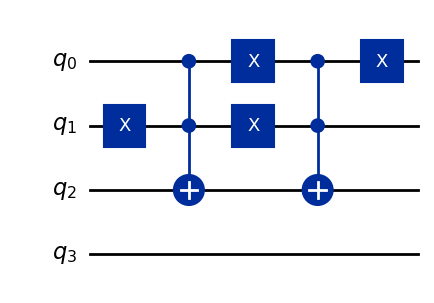

In [3]:
def qc_oracle():
  qc = QuantumCircuit(4, name='Uf')
  qc.x(1)
  qc.ccx(0,1,2)
  qc.x(1)
  qc.x(0)
  qc.ccx(0,1,2)
  qc.x(0)
  return qc

qco = qc_oracle()
qco.draw('mpl')

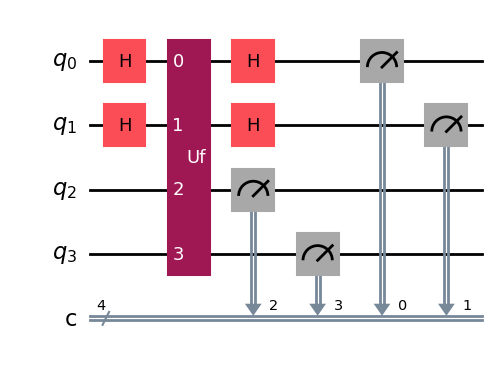

In [4]:
def qc_simon(n):
  qc = QuantumCircuit(2*n,2*n)
  qc.h(list(range(n)))
  qco = qc_oracle()
  qc.append(qco,list(range(2*n)))
  qc.h(list(range(n)))
  qc.measure(list(range(2*n)),list(range(2*n)))
  return qc

qcs = qc_simon(2)
qcs.draw('mpl')

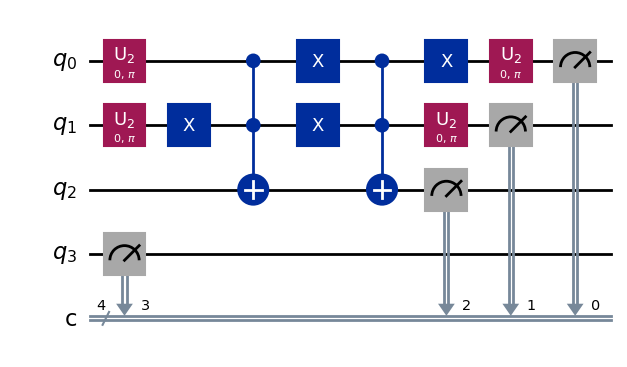

In [5]:
qcs.decompose().draw('mpl')

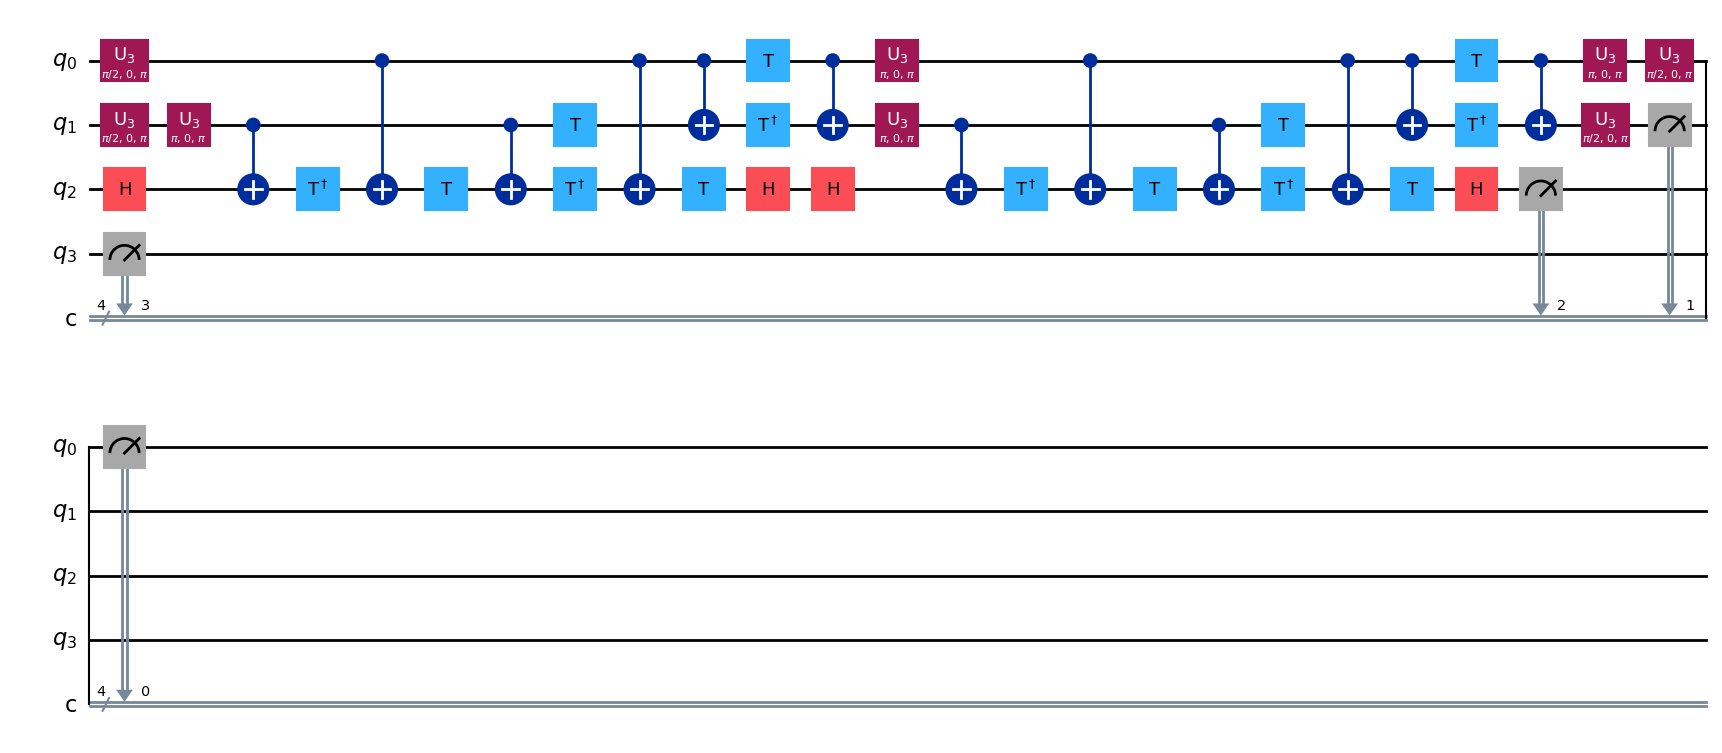

In [6]:
qcs.decompose().decompose().draw('mpl')

#### Simulação

In [7]:
from qiskit_aer import AerSimulator
backend = AerSimulator()
from qiskit_ibm_runtime import SamplerV2 as Sampler
sampler = Sampler(mode=backend)

In [8]:
qc_list = []
qcs = qc_simon(2)
qc_list.append(qcs.decompose())

In [9]:
nshots = 2**12
job = sampler.run(qc_list, shots=nshots)

In [10]:
counts_sim = job.result()[0].data.c.get_counts()
counts_sim # ok!

{'0111': 1016, '0100': 1025, '0011': 1044, '0000': 1011}

#### Experimento

In [11]:
from qiskit_ibm_runtime import QiskitRuntimeService
service = QiskitRuntimeService(channel="ibm_quantum",
                               token="73c402bf76f5a8b690c0f1419cc6943e22a716eff186a50022d399ba2758698c53d29eb903241228c994a2840fbeb2f2f37068dc7835f7bce3f6ded8b6bae631")
backend = service.backend(name="ibm_osaka")

In [12]:
from qiskit import transpile
qc_transpiled_list = transpile(qc_list, backend=backend, optimization_level=1)

In [13]:
from qiskit_ibm_runtime import SamplerV2 as Sampler
sampler = Sampler(mode=backend)
sampler.options.dynamical_decoupling.enable = True
sampler.options.dynamical_decoupling.sequence_type = "XY4"

In [ ]:
job = sampler.run(qc_transpiled_list)
print(job.job_id())

cta6msv7rgf00085w0h0


In [14]:
job_id = "cta6msv7rgf00085w0h0"
job = service.job(job_id)

In [15]:
counts_exp = job.result()[0].data.c.get_counts()
print(counts_exp)

{'0000': 856, '0011': 827, '0100': 737, '0111': 949, '1011': 85, '1000': 99, '0001': 92, '0110': 82, '1100': 80, '0101': 85, '1101': 15, '1110': 11, '1111': 104, '1010': 4, '0010': 65, '1001': 5}


#### Gráfico

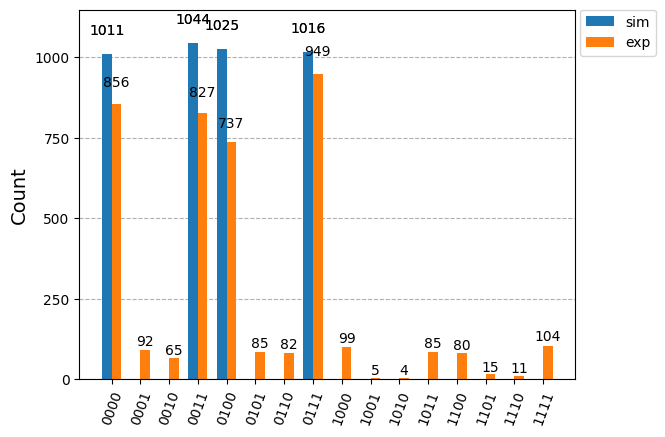

In [16]:
from qiskit.visualization import plot_histogram
plot_histogram([counts_sim,counts_exp],legend = ['sim','exp'])

### Exemplo ($n=3$)

Vamos considerar o exemplo
\begin{align}
x=\ & \ 000,\ 001,\ 010,\ 011,\ 100,\ 101,\ 110,\ 111, \\
f(x)= & \ 011,\ 101,\ 000,\ 010,\ 101,\ 011,\ 010,\ 000.
\end{align}
para o qual
$$r=101.$$
Nesse caso o oráculo quântico é representado pelo seguinte operador unitário:
\begin{align}
U_f & = \sum_{x=0}^{2^3 -1}\sum_{y=0}^{2^3 -1}|x\rangle\langle x|\otimes|y\oplus f(x)\rangle\langle y| \\
& = \sum_{y=0}^{7}\big(|000\rangle\langle 000|\otimes|y\oplus f(000)\rangle\langle y| + |001\rangle\langle 001|\otimes|y\oplus f(001)\rangle\langle y| + |010\rangle\langle 010|\otimes|y\oplus f(010)\rangle\langle y| + |011\rangle\langle 011|\otimes|y\oplus f(011)\rangle\langle y| + |100\rangle\langle 100|\otimes|y\oplus f(100)\rangle\langle y| + |101\rangle\langle 101|\otimes|y\oplus f(101)\rangle\langle y| + |110\rangle\langle 110|\otimes|y\oplus f(110)\rangle\langle y| + |111\rangle\langle 111|\otimes|y\oplus f(111)\rangle\langle y|\big) \\
& = \big(|000\rangle\langle 000|\otimes\sum_{y=0}^{7}|y\oplus 011\rangle\langle y| + |001\rangle\langle 001|\otimes\sum_{y=0}^{7}|y\oplus 101\rangle\langle y| + |010\rangle\langle 010|\otimes\sum_{y=0}^{7}|y\oplus 000\rangle\langle y| + |011\rangle\langle 011|\otimes\sum_{y=0}^{7}|y\oplus 010\rangle\langle y| + |100\rangle\langle 100|\otimes\sum_{y=0}^{7}|y\oplus 101\rangle\langle y| + |101\rangle\langle 101|\otimes\sum_{y=0}^{7}|y\oplus 011\rangle\langle y| + |110\rangle\langle 110|\otimes\sum_{y=0}^{7}|y\oplus 010\rangle\langle y| + |111\rangle\langle 111|\otimes\sum_{y=0}^{7}|y\oplus 000\rangle\langle y|\big) \\
& = |000\rangle\langle 000|\otimes I\otimes X\otimes X + |001\rangle\langle 001|\otimes X\otimes I\otimes X + |010\rangle\langle 010|\otimes I\otimes I\otimes I + |011\rangle\langle 011|\otimes I\otimes X\otimes I + |100\rangle\langle 100|\otimes X\otimes I\otimes X + |101\rangle\langle 101|\otimes I\otimes X\otimes X + |110\rangle\langle 110|\otimes I\otimes X\otimes I + |111\rangle\langle 111|\otimes I\otimes I\otimes I \\
& = (|000\rangle\langle 000|+|101\rangle\langle 101|)\otimes I\otimes X\otimes X + (|001\rangle\langle 001|+|100\rangle\langle 100|)\otimes X\otimes I\otimes X + (|010\rangle\langle 010|+|111\rangle\langle 111|)\otimes I\otimes I\otimes I + (|011\rangle\langle 011| + |110\rangle\langle 110|)\otimes I\otimes X\otimes I \\
& = ???
\end{align}

em que usamos
\begin{align}
\sum_{y=0}^{7}|y\oplus 000\rangle\langle y| & = \sum_{y=0}^{7}|y\rangle\langle y| = I\otimes I\otimes I, \\
\sum_{y=0}^{7}|y\oplus 011\rangle\langle y| & = |000\oplus011\rangle\langle 000| + |001\oplus011\rangle\langle 001| + |010\oplus011\rangle\langle 010| + |011\oplus011\rangle\langle 011| + |100\oplus011\rangle\langle 100| + |101\oplus011\rangle\langle 101| + |110\oplus011\rangle\langle 110| + |111\oplus011\rangle\langle 111| \\
& = |011\rangle\langle 000| + |010\rangle\langle 001| + |001\rangle\langle 010| + |000\rangle\langle 011| + |111\rangle\langle 100| + |110\rangle\langle 101| + |101\rangle\langle 110| + |100\rangle\langle 111| \\
& = (|0\rangle\langle 0|+|1\rangle\langle 1|)_0 \otimes(|00\rangle\langle 11|+|01\rangle\langle 10|+|10\rangle\langle 01|+|11\rangle\langle 00|)_{12} \\
& = I_0\otimes(|0\rangle\langle 1|+|1\rangle\langle 0|)_1\otimes(|0\rangle\langle 1|+|1\rangle\langle 0|)_2 \\
& = I\otimes X\otimes X, \\
\sum_{y=0}^{7}|y\oplus 101\rangle\langle y| & = |000\oplus 101\rangle\langle 000| + |001\oplus 101\rangle\langle 001| + |010\oplus 101\rangle\langle 010| + |011\oplus 101\rangle\langle 011| + |100\oplus 101\rangle\langle 100| + |101\oplus 101\rangle\langle 101| + |110\oplus 101\rangle\langle 110| + |111\oplus 101\rangle\langle 111| \\
& = |101\rangle\langle 000| + |100\rangle\langle 001| + |111\rangle\langle 010| + |110\rangle\langle 011| + |001\rangle\langle 100| + |000\rangle\langle 101| + |011\rangle\langle 110| + |010\rangle\langle 111| \\
& = (|0\rangle\langle 0|+|1\rangle\langle 1|)_1 \otimes(|00\rangle\langle 11|+|01\rangle\langle 10|+|10\rangle\langle 01|+|11\rangle\langle 00|)_{02} \\
& = X\otimes I\otimes X, \\
\sum_{y=0}^{7}|y\oplus 010\rangle\langle y| & = |000\oplus 010\rangle\langle 000| + |001\oplus 010\rangle\langle 001| + |010\oplus 010\rangle\langle 010| + |011\oplus 010\rangle\langle 011| + |100\oplus 010\rangle\langle 100| + |101\oplus 010\rangle\langle 101| + |110\oplus 010\rangle\langle 110| + |111\oplus 010\rangle\langle 111| \\
& = |010\rangle\langle 000| + |011\rangle\langle 001| + |000\rangle\langle 010| + |001\rangle\langle 011| + |110\rangle\langle 100| + |111\rangle\langle 101| + |100\rangle\langle 110| + |101\rangle\langle 111| \\
& = (|0\rangle\langle 0|+|1\rangle\langle 1|)_3 \otimes(|01\rangle\langle 00|+|00\rangle\langle 01|+|11\rangle\langle 10|+|10\rangle\langle 11|)_{12} \\
& = I\otimes X\otimes I.
\end{align}

## Complexidade computacional

A princípio, ao executar o algoritmo de Simon $n$, precisamos obter $n-1$ vetores
$$\{y^{(j)}\}_{j=0}^{n-2}$$
linearmente independentes (LI). Tendo esses vetores LI, podemos resolver, de forma eficiente, o sistema de equações lineares
$$\{y^{(j)}\cdot r=0\bmod 2\}_{j=0}^{n-2}.$$

Mas, se executarmos o algoritmo $n$ vezes, pode ocorrer de os $n$ vetores $\{y^{(j)}\}_{j=0}^{n-2}$ não serem LI, o que nos levará a um erro na predição de $r$. Em relação a essa questão, não precisamos verificar se os vetores $\{y^{(j)}\}_{j=0}^{n-2}$ são ou não LI, podemos testar se
$$f(x)=f(x\oplus r)$$
para alguns valores de $x$, e assim verificar se $r$ é de fato solução.




Digamos que executamos o algoritmo de Simon $m$ vezes e obtivemos $m$ vetores $y^{(j)}$ LI. A probabilidade da próxima execução nos retornar um vetor LI é
$$\frac{2^n - 2^m}{2^n} = 1-\frac{2^m}{2^n}.$$
Usando essa igualdade, temos que a probabilidade de obtermos $n$ vetores LI é
\begin{align}
P_{LI} & = \Big(1-\frac{2^1}{2^n}\Big)\Big(1-\frac{2^2}{2^n}\Big)\Big(1-\frac{2^3}{2^n}\Big)\cdots\Big(1-\frac{2^{n-2}}{2^n}\Big) \\
& = \Big(1-\frac{1}{2^{n-1}}\Big)\Big(1-\frac{1}{2^{n-2}}\Big)\Big(1-\frac{1}{2^{n-3}}\Big)\cdots\Big(1-\frac{1}{2^2}\Big) \\
& \ge 1-\sum_{j=2}^{n}\frac{1}{2^j} \\
& = \frac{1}{2} - \frac{1}{2^n} \\
& \approx \frac{1}{2}
\end{align}
para $n\gg1$. Acima usamos que
$$(1-a)(1-b) = 1-a-b+ab \ge 1-a-b \text{ para } a,b\in[0,1].$$

Também usamos a série geométrica $\sum_{j=1}^n a r^{j-1} = \frac{a\big(1-r^n\big)}{1-r}$ com $a=1$ e $r=1/2$ para obter
\begin{align}
\sum_{j=2}^{n} \frac{1}{2^{j}} & = \sum_{j=2}^{n} \Big(\frac{1}{2}\Big)^j  = \sum_{j=2}^{n} \Big(\frac{1}{2}\Big)^j \Big(\frac{1}{2}\Big)^{-1} \Big(\frac{1}{2}\Big)^1 \\
& = \frac{1}{2}\sum_{j=2}^{n} \Big(\frac{1}{2}\Big)^{j-1}  = \frac{1}{2}\Big(-1+1+\sum_{j=2}^{n} \Big(\frac{1}{2}\Big)^{j-1} \Big) \\
& = \frac{1}{2}\Big(-1+\sum_{j=1}^{n} \Big(\frac{1}{2}\Big)^{j-1} \Big) = \frac{1}{2}\Big(-1+\frac{(1-1/2)^n}{1-1/2} \Big) \\
& = \frac{1}{2}\Big(-1+2(1-1/2^n) \Big) \\
& = \frac{1}{2} + \frac{1}{2^n}.
\end{align}

A probabilodade de erro é aproximadamente constante ($\approx 1/2$), e diminui (não aumenta) com $n$. Isso pode ser usado para como argumento para dizer que a probabilidade de erro decai exponencialmente com o número de aplicações do algoritmo. Ou seja, o algoritmo é eficiente.

$$CC_Q = \mathcal{O}(n)$$

No caso __clássico__, vale observar que teremos resolvido o problema se acharmos um par colisor $(a,b)$, pois $r=a\oplus b$. Começamos escolhendo um certo $a$, por exemplo, o 1º elemento $a=00\cdots 00$ do domínio $\{0,1\}^n$. Sorteando aleatoriamente, ou escolhendo de forma determinística, o outro elemento $b$ do domínio, podemos encontrar o par ordenado no 1º sorteio, na melhor da hipóteses, ou somente depois de ter feito $2^n - 1$ sorteios, no pior cenário. Como os diferentes números de sorteios são equiprováveis, em média precisaremos do seguinte número de sorteios:
\begin{align}
\langle NS\rangle & = \frac{1}{2^n -1}(1+2+\cdots+2^{n-1}+1) \\
& = \frac{1}{2^n -1}\Big(\frac{2^{n-1}(2^{n-1}+1)}{2}+1\Big) \\
& \approx \frac{1}{2^n}\Big(\frac{2^{n-1}(2^{n-1})}{2}+1\Big) \\
& \approx 2^{n-3}+2^{-n} \\
& \approx 2^{n-3},
\end{align}
pra $n\gg 1.$ Acima usamos que $\frac{1}{2^n-1}$ é o número de possíbilidades para os diferentes números de sorteios que podem ser necessários.

Classicamente teríamos que chamar o oráculo, em média,
$$CC_C = \mathcal{O}(2^{n})$$
vezes. Com isso, vemos que o algoritmo de Simon oferece um ganho exponencial em relação a algoritmos clássicos.

O algoritmo de Simon tem um ganho exponencial no número de chamadas da caixa preta quântica em relação a algoritmos clássicos com erro limitado (ACEL). O algoritmo de Bernstein-Vazirani tem um ganho superpolinomial em relação a ACEL, enquanto que o algoritmo de Deutsch-Jozsa tem ganho constante em relação a ACEL.

Vale mencionar também que o algoritmo de Simon motivou Shor a propor seu bem conhecido algoritmo de fatoração, que é um algoritmo de extrema importância prática.

## Referências

1. D. R. Simon, “On the power of quantum computation,” in Proceedings 35th Annual Symposium on Foundations of Computer Science, Nov. 1994, pp. 116-123. doi: 10.1109/SFCS.1994.365701.

1. M. A. Nielsen and I. L. Chuang, Quantum Computation and Quantum Information (Cambridge University Press, Cambridge, England, 2000).

1. Richard Cleve, Introduction to Quantum Information Processing (2023), https://cs.uwaterloo.ca/~cleve/courses/F11CS667/, https://youtube.com/playlist?list=PLgOc9DWm_Ey3cnHXjmu8f__ki5AJYd53p&si=etCdYsFeCUBTgclj.

1. Dave Bacon, Lecture Notes on Quantum Computing (2006), https://courses.cs.washington.edu/courses/cse599d/06wi/.

1. John Preskill, Lecture Notes on Quantum Computation, http://theory.caltech.edu/~preskill/ph219/index.html#lecture.

1. A. Javadi-Abhari et al., “Quantum computing with Qiskit.” arXiv, May 14, 2024. doi: 10.48550/arXiv.2405.08810.
